&emsp;

&emsp;

<center><b><font style="color: orange"  size="10">Medical Image Analysis Lab 1</font></b></center>
<center><b><font style="color: orange" size="8">___________</font></b></center>
&ensp;
<center><b><font style="color: orange" size="5">Part 2: Anisotropic Diffusion</font></b></center>
&ensp;
<center><b><font style="color: orange" size="3">Patricia Crecis Molina, Marta Ojeda Velázquez, Amanda Román Román, Sara Valiente Jaén</font></b></center>
&nbsp;

<center><b><font style="color: orange" size="3">________________________________</font></b></center>

<center><div class="alert alert-block alert-warning">
Definition and goal
</div></center>

Anisotropic diffusion is a **solution** to smoothing filters, since for example by applying a Gaussian filter we smooth the image by diffusing the gray values in all directions, the **condition of homogeneity** (isotropy) is assumed. However we can find areas where we are not interested in blurring the image, such as the **edges**. 
Anisotropic diffusion also called **Perona and Malik filtering** gets around this problem being the smoothing greater within a region than with neighboring regions (edges). To do this **we use the gradient**, we have implemented an anisotropic diffusion function "anisodiff" that will alow us to perform a proper filtering. 

The **goal** of this lab practice is to achieve a smaller smoothing in edge areas and greater smoothing in homogeneous areas. How?
By applying a derived filter (in our case we chose a **sobel filter**), and choosing a certain gradient value as a **threshold** that will decide whether to apply or not filtering. We compare each gradient value (after performing a sobel filter) of our input image with the selected threshold, if it is greater, means it belongs to an area with high gradient (edge) therefore the diffusion will be smaller leaving the gray value of the input image as it is, and if it is smaller than the threshold (area with low gradient) the diffusion and therefore the smoothing will be greater. To evaluate the results of applying anisotropic filtering, we will display the Original Image without noise, the selected noisy image, the gaussian filtered image and the anisotropic one in order to see the differences and be able to observe that the edges are less smoothed.

<center><div class="alert alert-block alert-warning">
Importing modules and files' functions, and reading the images
</div></center>

In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from noise_filtering_f import *

First we will perform **adaptive smoothing** of a brain image, but this can be changed choosing a different image.

In [2]:
img = io.imread('Brain.tif',as_gray=True)
img = img/np.max(img)

<center><div class="alert alert-block alert-warning">
Adding noise
</div></center>

We will evaluate the results with different types of noisy images and different noise intensities. First we will use as input image a **impulsive noise image with an intensity of 100**. For choosing the noisy image we import the 'noise_f' function.

In [3]:
noisy_img,type_noise = noise_f('sp',100,img)

<center><div class="alert alert-block alert-warning">
Applying Anisotropic Diffusion - Brain
</div></center>

First we will see the output image after using a <font style="color: orange"><b>very low threshold</b></font> of 0.03 and a sigma value of 1 and we will evaluate if the result image changes if we <font style="color: orange"><b>increase the number of iterations</b></font> from 1 to 5.


We print the sobel matrix to see the values and choose the best threshold 

[[0.00554594 0.01318983 0.00746644 ... 0.00627757 0.00790417 0.00588235]
 [0.00527957 0.01042171 0.00620054 ... 0.01669548 0.01393399 0.0083189 ]
 [0.00499904 0.00554594 0.00706971 ... 0.01055915 0.00490196 0.        ]
 ...
 [0.24707633 0.49216077 0.2519913  ... 0.00571662 0.00693242 0.00693242]
 [0.00765711 0.25099763 0.35014277 ... 0.00404226 0.00138648 0.00970539]
 [0.00277297 0.00392157 0.00219222 ... 0.00196078 0.00903877 0.00713736]]


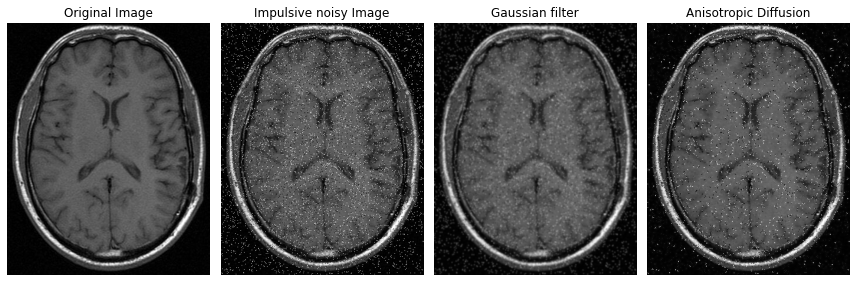

In [4]:
sobel_img, gauss_img, img_out = anisodiff(noisy_img, threshold=0.03, sigma=1, niter=1)
print(sobel_img)
plot_img((img,noisy_img,gauss_img,img_out),
         ('Original Image','{} noisy Image'.format(type_noise),'Gaussian filter','Anisotropic Diffusion'), cmap='gray')

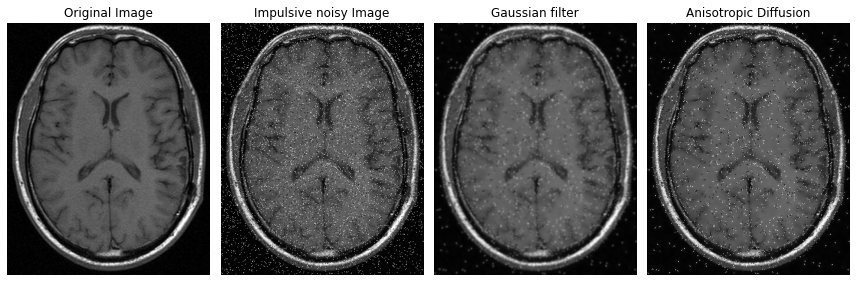

In [5]:
sobel_img, gauss_img, img_out3 = anisodiff(noisy_img, threshold=0.03, sigma=1, niter=5)

plot_img((img,noisy_img,gauss_img,img_out3),
         ('Original Image','{} noisy Image'.format(type_noise),'Gaussian filter','Anisotropic Diffusion'), cmap='gray')

As we can see, the result image is smoother in the center, we have reduced the impulsive noise in those homogeneous areas but we have kept the details, we can see the edges perfectly and it can be seen that the edges are less smoothed than with the gaussian filter. With respect to the number of iterations we can see that increasing them changes the gaussian filtered image but do not change the anisotropic result image since we are using a very low threshold, therefore the majority of the gradient values of the input image are going to be greater than that of the threshold and therefore a low smoothing will be performed, even if we increase the number of iterations. 

Now we will see what happens if we <font style="color: orange"><b>increase the threshold</b></font>, and if increasing the number of iterations using a higher threshold performs some changes in the output image.

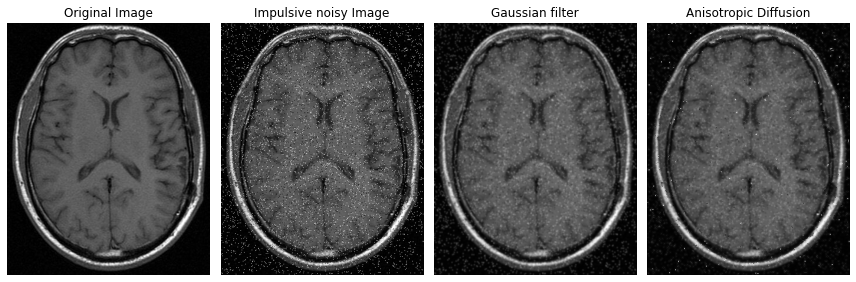

In [6]:
sobel_img, gauss_img, img_out = anisodiff(noisy_img, threshold=0.3, sigma=1, niter=1)

plot_img((img,noisy_img,gauss_img,img_out),
         ('Original Image','{} noisy Image'.format(type_noise),'Gaussian filter','Anisotropic Diffusion'), cmap='gray')

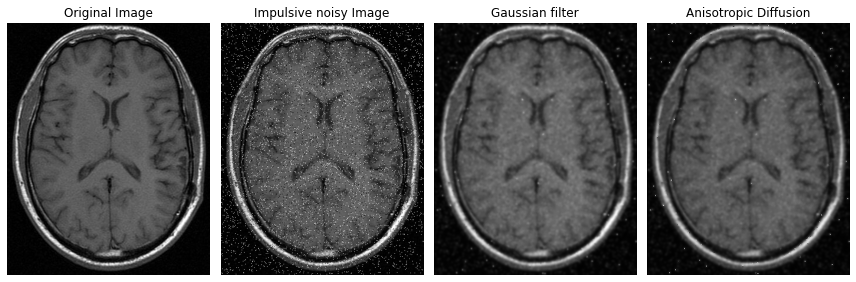

In [7]:
sobel_img, gauss_img, img_out = anisodiff(noisy_img, threshold=0.3, sigma=1, niter=3)

plot_img((img,noisy_img,gauss_img,img_out),
         ('Original Image','{} noisy Image'.format(type_noise),'Gaussian filter','Anisotropic Diffusion'), cmap='gray')

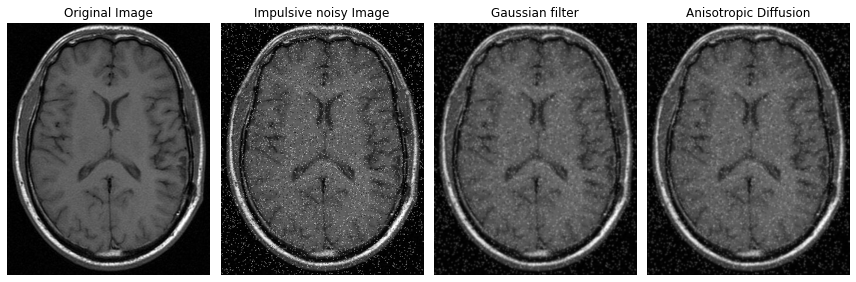

In [8]:
sobel_img, gauss_img, img_out = anisodiff(noisy_img, threshold=3, sigma=1, niter=1)

plot_img((img,noisy_img,gauss_img,img_out),
         ('Original Image','{} noisy Image'.format(type_noise),'Gaussian filter','Anisotropic Diffusion'), cmap='gray')

When we increase the threshold value with the same number of iterations and sigma value we can see that the smoothing is stronger because a greater amount of gradient values of the image are below that threshold and therefore smoothing in those points is performed. There is a value for the threshold where although you increase it nothing changes because all the values are below that threshold and therefore the maximum smoothing is performed, anisotropic diffusion becomes a gaussian filter itself because it performs smoothing in all the pixels (even the edges) in other words, the blurring produced on the image will be the same in all areas of the image. 

Also we can see that if we increase the number of iterations with the same threshold and sigma values, and being the threshold not too small, we can clearly see a greater smoothing, this is the effect of applying the procedure several times on the image, we filter the already filtered image, so the smoothing increases.

To continue, we will se what happens if we  <font style="color: orange"><b>increase the sigma value</b></font>.


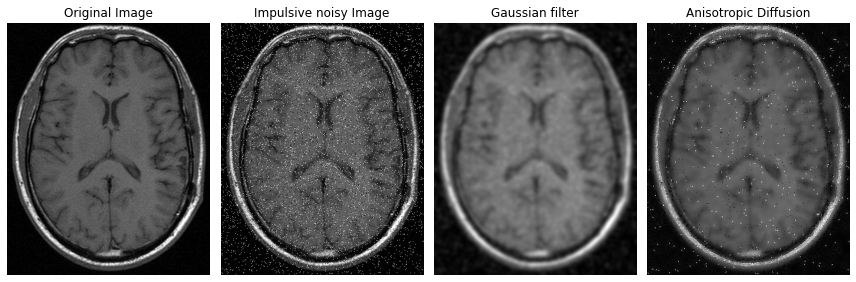

In [9]:
sobel_img, gauss_img, img_out = anisodiff(noisy_img, threshold=0.2, sigma=3, niter=1)

plot_img((img,noisy_img,gauss_img,img_out),
         ('Original Image','{} noisy Image'.format(type_noise),'Gaussian filter','Anisotropic Diffusion'), cmap='gray')

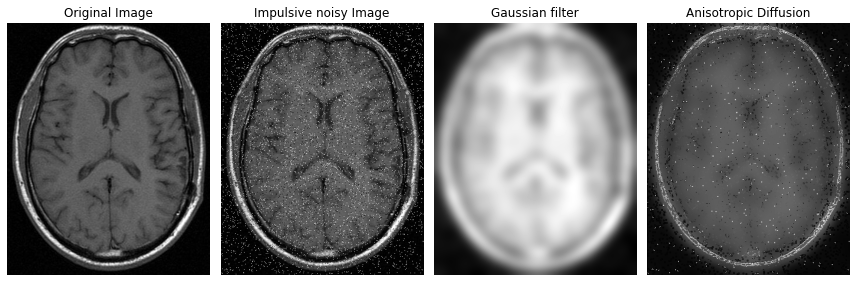

In [10]:
sobel_img, gauss_img, img_out = anisodiff(noisy_img, threshold=0.2, sigma=10, niter=1)

plot_img((img,noisy_img,gauss_img,img_out),
         ('Original Image','{} noisy Image'.format(type_noise),'Gaussian filter','Anisotropic Diffusion'), cmap='gray')

In this example we can see the advantages of anisotropic with respect to a simple gaussian filter, in the gaussian one we can not see anything, whereas in the anisotropic although is smoothed we can see the details.

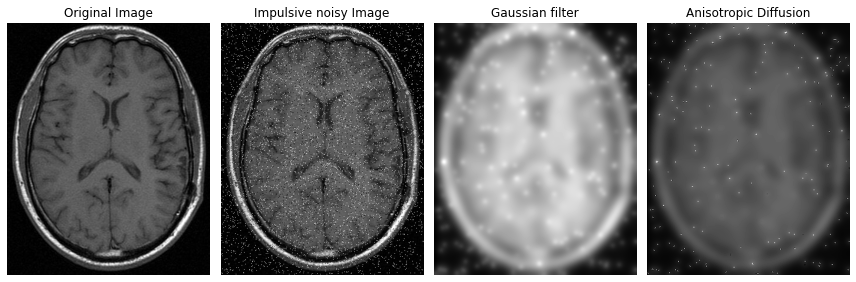

In [11]:
sobel_img, gauss_img, img_out = anisodiff(noisy_img, threshold=0.2, sigma=3, niter=10)

plot_img((img,noisy_img,gauss_img,img_out),
         ('Original Image','{} noisy Image'.format(type_noise),'Gaussian filter','Anisotropic Diffusion'), cmap='gray')

Sigma corresponds to the standard deviation of the gaussian filter, therefore the higher the sigma value, the wider the gaussian filter and the greater the smoothing process. We can see that due to this sigma increase, the gaussian filtered image changes being hard to see the details and although the anisotropic image is more blurry we can still see the edges. 
If we increase too much the sigma value or the number of iterations, the image will be very blurry and we won't be able to see anything.

After evaluating the different parameters, we came to the conclusion that it is a trade off between reducing the noise and keeping the edges in a higher or lower level, we have to choose the optimized parameters but taking into account what we want to study, or what will the image be used for after being filtered. All these parameters will be chosen depending also on the amount of noise our Original Image has. If it is a very noisy image, we will increase the sigma value.


Next, we will evaluate some results with a different noisy image, in this case we will be using <font style="color: orange"><b>white noise as input</b></font>. 


In [12]:
noisy_img,type_noise = noise_f('white',50,img)

[[0.29070358 0.11030527 0.24282128 ... 0.08842095 0.11719359 0.05079606]
 [0.20269525 0.09462056 0.11206267 ... 0.09068135 0.06151761 0.01759425]
 [0.17220259 0.11883513 0.0862514  ... 0.00718339 0.03392282 0.05584645]
 ...
 [0.24199675 0.29200134 0.03612405 ... 0.15648977 0.07572844 0.06277877]
 [0.24597846 0.24296058 0.09048447 ... 0.1453299  0.09358995 0.05743104]
 [0.27431174 0.20056944 0.06009926 ... 0.03249296 0.0499643  0.02008485]]


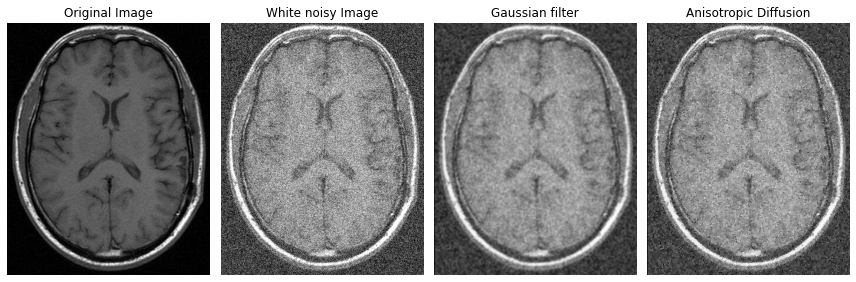

In [13]:
sobel_img, gauss_img, img_out = anisodiff(noisy_img, threshold=0.09, sigma=1, niter=3)
print(sobel_img)
plot_img((img,noisy_img,gauss_img,img_out),
         ('Original Image','{} noisy Image'.format(type_noise),'Gaussian filter','Anisotropic Diffusion'), cmap='gray')

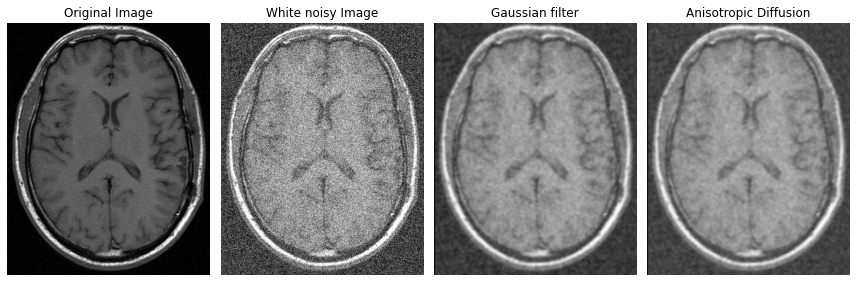

In [14]:
sobel_img, gauss_img, img_out = anisodiff(noisy_img, threshold=0.3, sigma=1, niter=3)

plot_img((img,noisy_img,gauss_img,img_out),
         ('Original Image','{} noisy Image'.format(type_noise),'Gaussian filter','Anisotropic Diffusion'), cmap='gray')

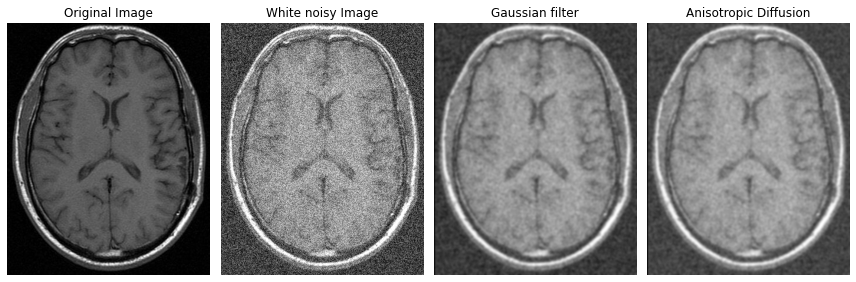

In [15]:
sobel_img, gauss_img, img_out = anisodiff(noisy_img, threshold=0.5, sigma=1, niter=3)

plot_img((img,noisy_img,gauss_img,img_out),
         ('Original Image','{} noisy Image'.format(type_noise),'Gaussian filter','Anisotropic Diffusion'), cmap='gray')

We can see that lower thresholds are better parameters to obtain output images that keep the details, meaning that more areas of interest (edges) will be kept since they have higher gradient than that of the threshold.

In [16]:
noisy_img,type_noise = noise_f('white',80,img)

[[0.20158903 0.13685413 0.11821683 ... 0.11739253 0.19501172 0.32498574]
 [0.13117757 0.1122103  0.24346798 ... 0.09619728 0.04088047 0.03067614]
 [0.22056128 0.0108613  0.29894284 ... 0.16094508 0.15707104 0.06794483]
 ...
 [0.14778083 0.2078837  0.20814361 ... 0.24206403 0.21210991 0.3439835 ]
 [0.19014385 0.22422641 0.18401054 ... 0.16862929 0.38467901 0.23083342]
 [0.08525496 0.40342306 0.22695802 ... 0.17099053 0.43633639 0.22822745]]


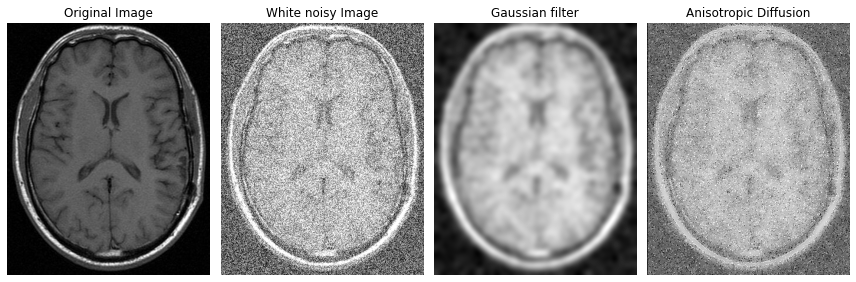

In [17]:
sobel_img, gauss_img, img_out = anisodiff(noisy_img, threshold=0.2, sigma=5, niter=1)
print(sobel_img)
plot_img((img,noisy_img,gauss_img,img_out),
         ('Original Image','{} noisy Image'.format(type_noise),'Gaussian filter','Anisotropic Diffusion'), cmap='gray')

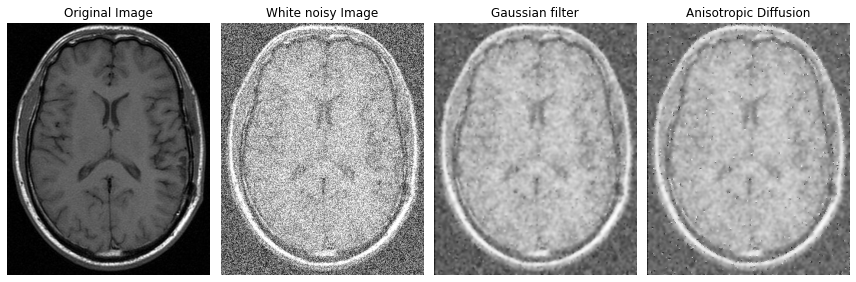

In [18]:
sobel_img, gauss_img, img_out = anisodiff(noisy_img, threshold=0.2, sigma=1, niter=5)

plot_img((img,noisy_img,gauss_img,img_out),
         ('Original Image','{} noisy Image'.format(type_noise),'Gaussian filter','Anisotropic Diffusion'), cmap='gray')

When we have a more noisy input image (we have increased the intensity of the white noise), is better to increase the sigma value for the smoothing to be grater. As we can see in the results increasing the sigma value gives an output image with more details than when increasing the number of iterations.

Finally we will evaluate the results with <font style="color: orange"><b>gaussian noise as input</b></font>.


In [19]:
noisy_img,type_noise = noise_f('gaussian',15,img)

[[0.02678616 0.02616821 0.10763248 ... 0.09626177 0.18271245 0.02972043]
 [0.06866672 0.10411939 0.07777152 ... 0.10449178 0.08884368 0.02460193]
 [0.0253273  0.03520715 0.04499414 ... 0.04638995 0.06497615 0.09335399]
 ...
 [0.04970159 0.15424475 0.14276178 ... 0.04366492 0.02414795 0.05921097]
 [0.06846892 0.09460931 0.12639109 ... 0.02468235 0.04825965 0.02604884]
 [0.01227254 0.12088818 0.12868981 ... 0.00428748 0.01637981 0.05730509]]


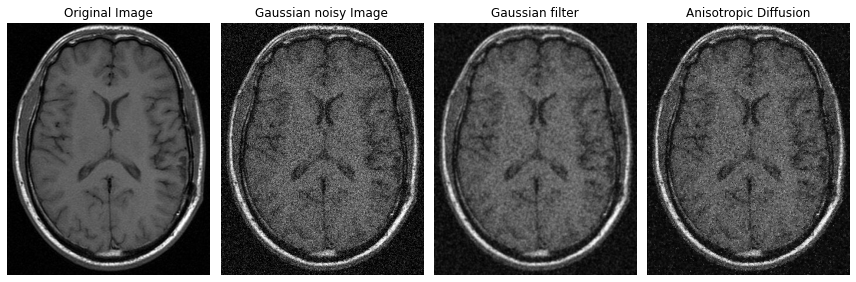

In [20]:
sobel_img, gauss_img, img_out = anisodiff(noisy_img, threshold=0.1, sigma=1, niter=1)
print(sobel_img)
plot_img((img,noisy_img,gauss_img,img_out),
         ('Original Image','{} noisy Image'.format(type_noise),'Gaussian filter','Anisotropic Diffusion'), cmap='gray')

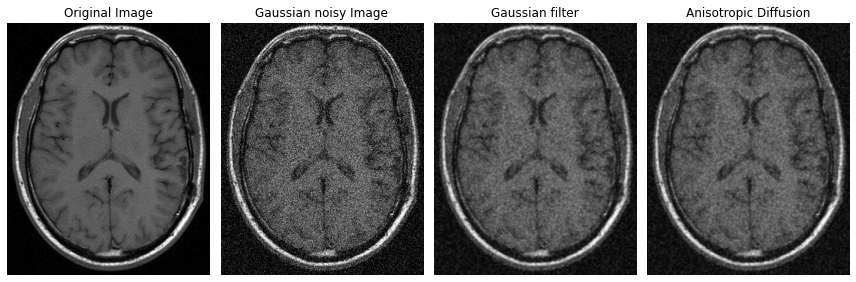

In [21]:
sobel_img, gauss_img, img_out = anisodiff(noisy_img, threshold=0.5, sigma=1, niter=1)

plot_img((img,noisy_img,gauss_img,img_out),
         ('Original Image','{} noisy Image'.format(type_noise),'Gaussian filter','Anisotropic Diffusion'), cmap='gray')

We can see that when we increase the threshold, the anisotropic output image is more similar to the gaussian filtered image.

In [22]:
noisy_img,type_noise = noise_f('gaussian',60,img)

0.3278094419259938


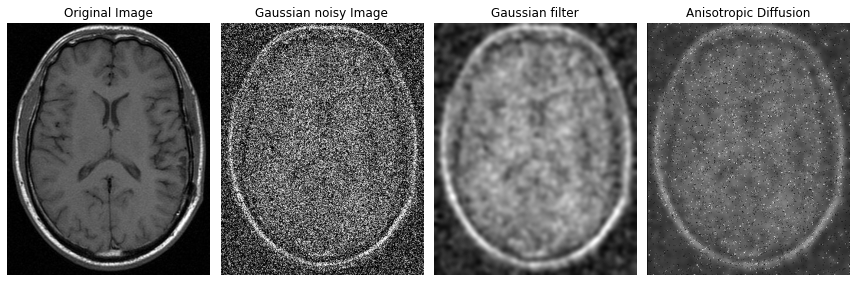

In [23]:
sobel_img, gauss_img, img_out = anisodiff(noisy_img, threshold=0.5, sigma=4, niter=1)
print(sobel_img[345][245])
plot_img((img,noisy_img,gauss_img,img_out),
         ('Original Image','{} noisy Image'.format(type_noise),'Gaussian filter','Anisotropic Diffusion'), cmap='gray')

We have increased the gaussian noise intensity, so the best parameters will be chosen for example, by increasing the threshold and the sigma values to increase the smoothing procedure and reduce the noise.

<center><div class="alert alert-block alert-warning">
Applying Anisotropic Diffusion - Chest X-ray
</div></center>

In [24]:
img = io.imread('Chest.tif',as_gray=True)
img = img/np.max(img)

noisy_img,type_noise = noise_f('gaussian',50,img)

[[0.3037687  0.21181444 0.19899123 ... 0.18309624 0.22824409 0.20180583]
 [0.38908367 0.25623775 0.13350554 ... 0.14533367 0.25717953 0.2443146 ]
 [0.09869864 0.23651654 0.19433334 ... 0.3009805  0.17759866 0.23332693]
 ...
 [0.19224841 0.17468119 0.33283148 ... 0.08364494 0.02110273 0.04549472]
 [0.34135343 0.23843101 0.25944936 ... 0.05888011 0.15035719 0.3119135 ]
 [0.51436566 0.19501633 0.37721096 ... 0.007921   0.30640729 0.38646515]]


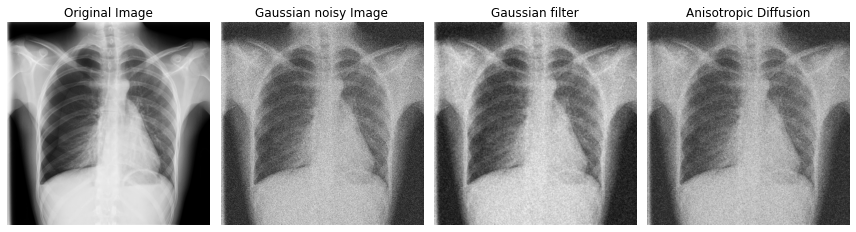

In [25]:
sobel_img, gauss_img, img_out = anisodiff(noisy_img, threshold=0.3, sigma=3, niter=1)
print(sobel_img)
plot_img((img,noisy_img,gauss_img,img_out),
         ('Original Image','{} noisy Image'.format(type_noise),'Gaussian filter','Anisotropic Diffusion'), cmap='gray')

In [26]:
noisy_img,type_noise = noise_f('sp',5000,img)

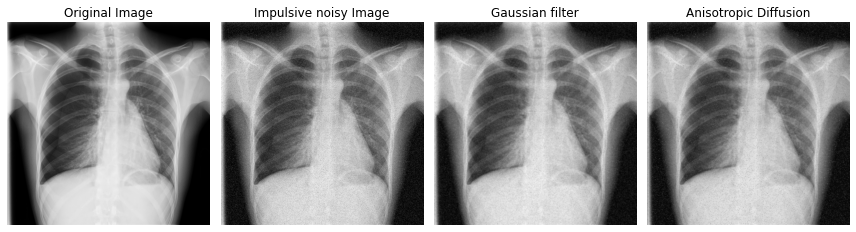

In [27]:
sobel_img, gauss_img, img_out = anisodiff(noisy_img, threshold=0.3, sigma=3, niter=1)

plot_img((img,noisy_img,gauss_img,img_out),
         ('Original Image','{} noisy Image'.format(type_noise),'Gaussian filter','Anisotropic Diffusion'), cmap='gray')

In [28]:
noisy_img,type_noise = noise_f('white',50,img)

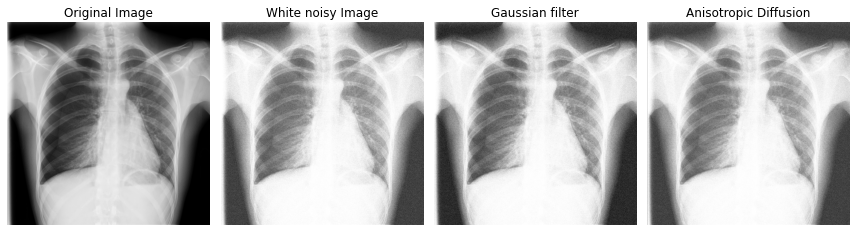

In [29]:
sobel_img, gauss_img, img_out = anisodiff(noisy_img, threshold=0.3, sigma=1, niter=1)

plot_img((img,noisy_img,gauss_img,img_out),
         ('Original Image','{} noisy Image'.format(type_noise),'Gaussian filter','Anisotropic Diffusion'), cmap='gray')

In conclusion, we think that the parameters must be optimized according to the intensity of the noise input, what we want to observe, the anatomical parts of the input image, and not so much to the type of noise since the parameters work similar independently of the type of noise. 

Also independently of the type of image we see that increasing the threshold, sigma value and number of iterations produce a greater smoothing. 

&nbsp;

<center><div class="alert alert-block alert-info">
Contribution of the members
</div></center>

&nbsp;

- **Code**: Patricia and Marta.
- **Jupyter and comments**: Patricia.

&nbsp;
&nbsp;

<center><font style="color: lightblue"><b>That would be all for Lab 1...</b></font></center>
&nbsp;
<center><font style="color: lightblue"><b>... we hope you liked it!</b></font></center>


&nbsp;

<div>
<img src="fun1.jpg" width="350"/>
</div>

&nbsp;

